# **Prodigy Infotech Internship**
### Task 4
Analyze and visualize sentiment patterns in social media data to understand public opinion and attitudes towards specific topics or brands

Dataset used: Medium App Review on Google Play Store

Import Libraries 

In [2]:
import re
import numpy as np
import pandas as pd
import nltk
#plotting
import seaborn as sns
import matplotlib.pyplot as plt
from wordcloud import WordCloud
#nltk
from nltk.stem import WordNetLemmatizer
#sklearn
from sklearn.svm import LinearSVC
from sklearn.naive_bayes import BernoulliNB
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics import confusion_matrix, classification_report

In [3]:
df = pd.read_csv("Medium App Review.csv")

Print first five rows of Medium App Review

In [4]:
df.head()

,reviewId,content,score,thumbsUpCount,reviewCreatedVersion,at,replyContent,repliedAt,predicted_category,sentiment,appVersion
0,326d4bdd-8fc6-4d64-b3bf-ce393fb2ae9b,woww,5,0,NaN,2022-08-16 05:55:38,NaN,NaN,USER_EXPERIENCE,NEUTRAL,NaN
1,4bbf741b-2f69-43cd-bb76-f9b5f84c83b5,let me know more details about this,3,0,4.5.1143533,2022-08-16 04:44:45,NaN,NaN,CONTENT,NEUTRAL,NaN
2,3cb1136d-e7c6-4999-aa84-fdc7bcdccf56,i've been using this for a while and there's a...,2,0,4.5.1143533,2022-08-16 04:05:27,NaN,NaN,INTERFACE,NEGATIVE,NaN
3,d6f80f05-a6e8-44f3-a380-7c59ed3d208b,good,2,0,4.5.1143533,2022-08-16 00:22:33,NaN,NaN,USER_EXPERIENCE,POSITIVE,NaN
4,eecb277c-c658-4b2d-86c9-77d3a7022cac,mjkobe,5,0,4.5.1143533,2022-08-15 20:08:25,NaN,NaN,USER_EXPERIENCE,NEUTRAL,NaN


In [5]:
df.shape

(51536, 11)

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 51536 entries, 0 to 51535
Data columns (total 11 columns):
 #   Column                Non-Null Count  Dtype 
---  ------                --------------  ----- 
 0   reviewId              51536 non-null  object
 1   content               51536 non-null  object
 2   score                 51536 non-null  int64 
 3   thumbsUpCount         51536 non-null  int64 
 4   reviewCreatedVersion  46006 non-null  object
 5   at                    51536 non-null  object
 6   replyContent          2477 non-null   object
 7   repliedAt             2477 non-null   object
 8   predicted_category    51536 non-null  object
 9   sentiment             51536 non-null  object
 10  appVersion            3495 non-null   object
dtypes: int64(2), object(9)
memory usage: 4.3+ MB


Lets remove unnecessary column

In [7]:
df.drop(["repliedAt","replyContent","appVersion","reviewCreatedVersion","reviewId","at"],axis = 1)

,content,score,thumbsUpCount,predicted_category,sentiment
0,woww,5,0,USER_EXPERIENCE,NEUTRAL
1,let me know more details about this,3,0,CONTENT,NEUTRAL
2,i've been using this for a while and there's a...,2,0,INTERFACE,NEGATIVE
3,good,2,0,USER_EXPERIENCE,POSITIVE
4,mjkobe,5,0,USER_EXPERIENCE,NEUTRAL
...,...,...,...,...,...
51531,i think arsenal is the best club this season,5,0,USER_EXPERIENCE,POSITIVE
51532,not much payment yeah!!!,1,0,SUBSCRIPTION,NEUTRAL
51533,good,5,0,USER_EXPERIENCE,POSITIVE
51534,ang dami ko naalala at naiyak natuwa na hiya s...,5,0,USER_EXPERIENCE,NEUTRAL


In [8]:
df["sentiment"].value_counts()

sentiment
POSITIVE    38821
NEUTRAL      6951
NEGATIVE     5764
Name: count, dtype: int64

<Axes: xlabel='score', ylabel='count'>

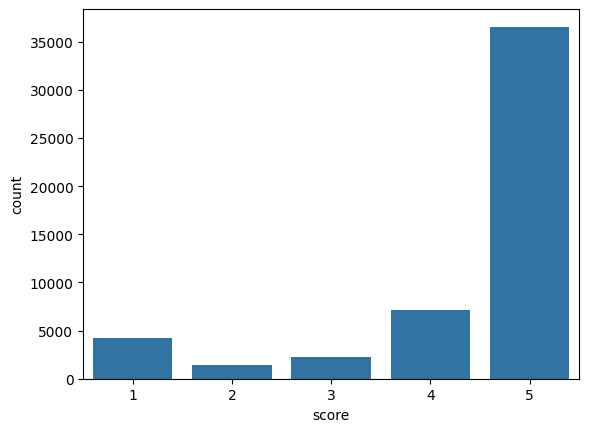

In [9]:
sns.countplot(x='score', data = df)

data_pos is known as data positive (if score is 4 & 5 that means data is positive)<br>
data_pos is known as data positive (if score is 1 & 2 that means data is negative)

In [10]:
data_pos = df[df['score'] == 5]
data_pos = df[df['score'] == 4]
data_neg = df[df['score'] == 2]
data_neg = df[df['score'] == 1]

In [11]:
data_pos = data_pos.iloc[:int(10000)]
data_neg = data_neg.iloc[:int(10000)]

In [12]:
dataset = pd.concat([data_pos, data_neg])

In [13]:
dataset['content']=dataset['content'].str.lower()
dataset['content'].tail()

51517                      very difficult to trying log in
51523    no rating unless find out correct method to us...
51527    the content actually not authentic, so please ...
51530                                           pay to win
51532                             not much payment yeah!!!
Name: content, dtype: object

In [14]:
stopwordlist = ['a', 'about', 'above', 'after', 'again', 'ain', 'all', 'am', 'an',
'and','any','are', 'as', 'at', 'be', 'because', 'been', 'before',
'being', 'below', 'between','both', 'by', 'can', 'd', 'did', 'do',
'does', 'doing', 'down', 'during', 'each','few', 'for', 'from',
'further', 'had', 'has', 'have', 'having', 'he', 'her', 'here',
'hers', 'herself', 'him', 'himself', 'his', 'how', 'i', 'if', 'in',
'into','is', 'it', 'its', 'itself', 'just', 'll', 'm', 'ma',
'me', 'more', 'most','my', 'myself', 'now', 'o', 'of', 'on', 'once',
'only', 'or', 'other', 'our', 'ours','ourselves', 'out', 'own', 're','s',
'same', 'she', "shes", 'should', "shouldve",'so', 'some', 'such',
't', 'than', 'that', "thatll", 'the', 'their', 'theirs', 'them',
'themselves', 'then', 'there', 'these', 'they', 'this', 'those',
'through', 'to', 'too','under', 'until', 'up', 've', 'very', 'was',
'we', 'were', 'what', 'when', 'where','which','while', 'who', 'whom',
'why', 'will', 'with', 'won', 'y', 'you', "youd","youll", "youre",
"youve", 'your', 'yours', 'yourself', 'yourselves']

Remove Stopwords

In [16]:
STOPWORDS = set(stopwordlist)
def clean_stopwords(content):
    return " ". join([word for word in str (content).split() if word not in STOPWORDS])
dataset["content"] = dataset["content"].apply(lambda content : clean_stopwords(content))
dataset["content"].head()

11    wonderful app, managers, editorial staffs idea...
23                                     it's really good
30                                           very. good
36    enjoy reading articles writing advice given he...
48    nice reccomendation system infinite amount top...
Name: content, dtype: object

Remove repeating character

In [17]:
def cleaning_repeating_char(text):
    return re.sub(r'(.)1+', r'1', text)
dataset['content'] = dataset['content'].apply(lambda x: cleaning_repeating_char(x))
dataset['content'].head()

11    wonderful app, managers, editorial staffs idea...
23                                     it's really good
30                                           very. good
36    enjoy reading articles writing advice given he...
48    nice reccomendation system infinite amount top...
Name: content, dtype: object

Remove Numbers

In [18]:
def cleaning_numbers(data):
    return re.sub('[0-9]+', '', data)
dataset['content'] = dataset['content'].apply(lambda x: cleaning_numbers(x))
dataset['content'].head()

11    wonderful app, managers, editorial staffs idea...
23                                     it's really good
30                                           very. good
36    enjoy reading articles writing advice given he...
48    nice reccomendation system infinite amount top...
Name: content, dtype: object

Tokenization

In [19]:
from nltk.tokenize import RegexpTokenizer
tokenizer = RegexpTokenizer(r'\w+')
dataset['content'] = dataset['content'].apply(tokenizer.tokenize)
dataset['content'].head()

11    [wonderful, app, managers, editorial, staffs, ...
23                                [it, s, really, good]
30                                         [very, good]
36    [enjoy, reading, articles, writing, advice, gi...
48    [nice, reccomendation, system, infinite, amoun...
Name: content, dtype: object

Stemming

In [20]:
st = nltk.PorterStemmer()
def stemming_on_text(data):
    text = [st.stem(word) for word in data]
    return data
dataset['content']= dataset['content'].apply(lambda x: stemming_on_text(x))
dataset['content'].head()

11    [wonderful, app, managers, editorial, staffs, ...
23                                [it, s, really, good]
30                                         [very, good]
36    [enjoy, reading, articles, writing, advice, gi...
48    [nice, reccomendation, system, infinite, amoun...
Name: content, dtype: object

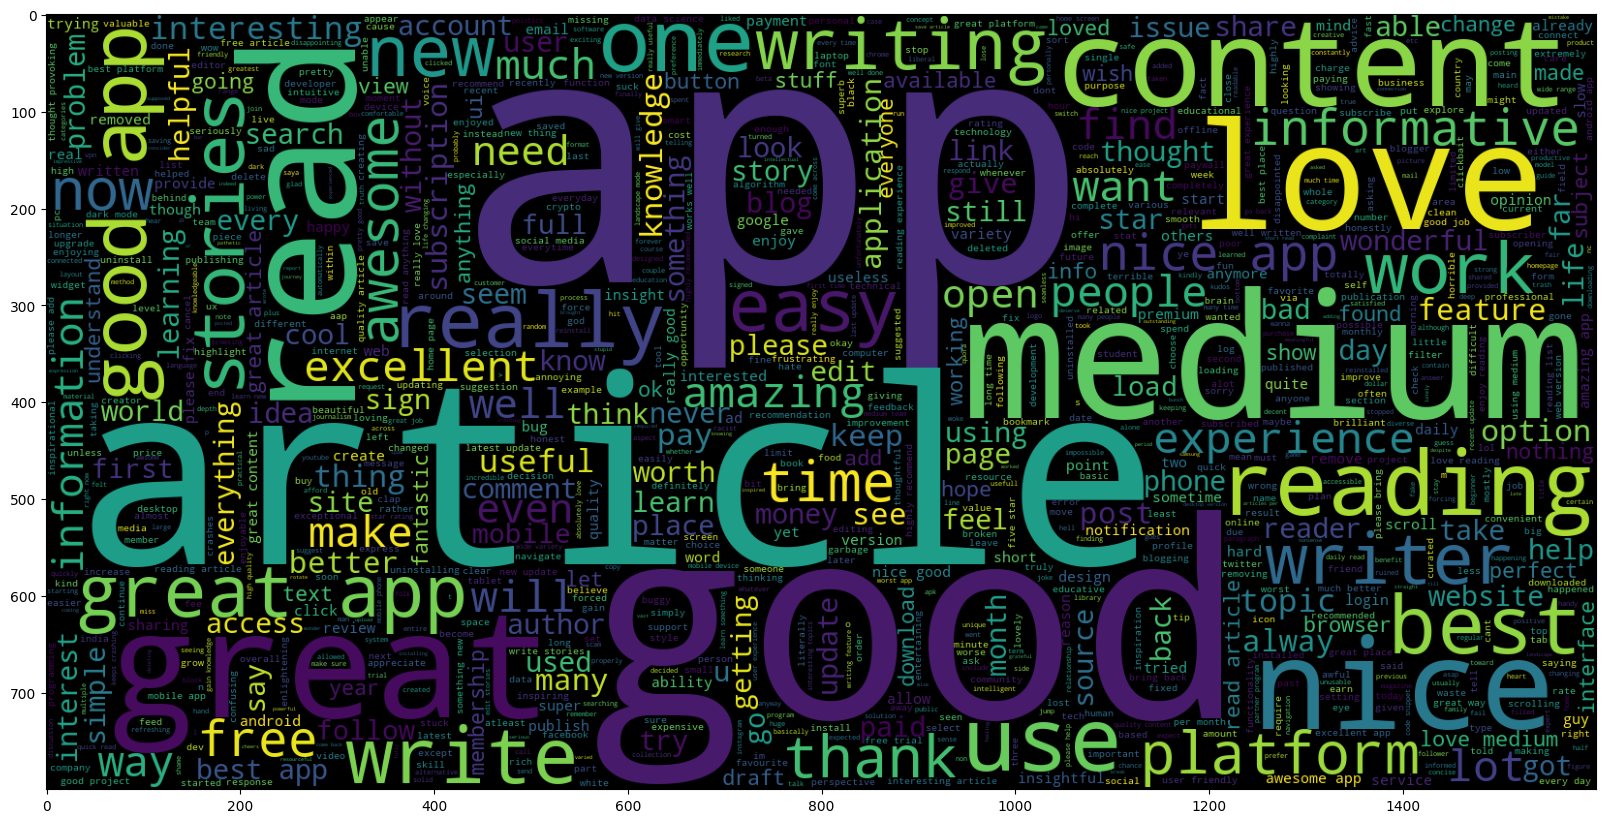

In [21]:
data_neg = df['content'][:10000]
plt.figure(figsize = (20,20))
wc = WordCloud(max_words = 1000 , width = 1600 , height = 800,
collocations=True).generate(" ".join(data_neg))
plt.imshow(wc)

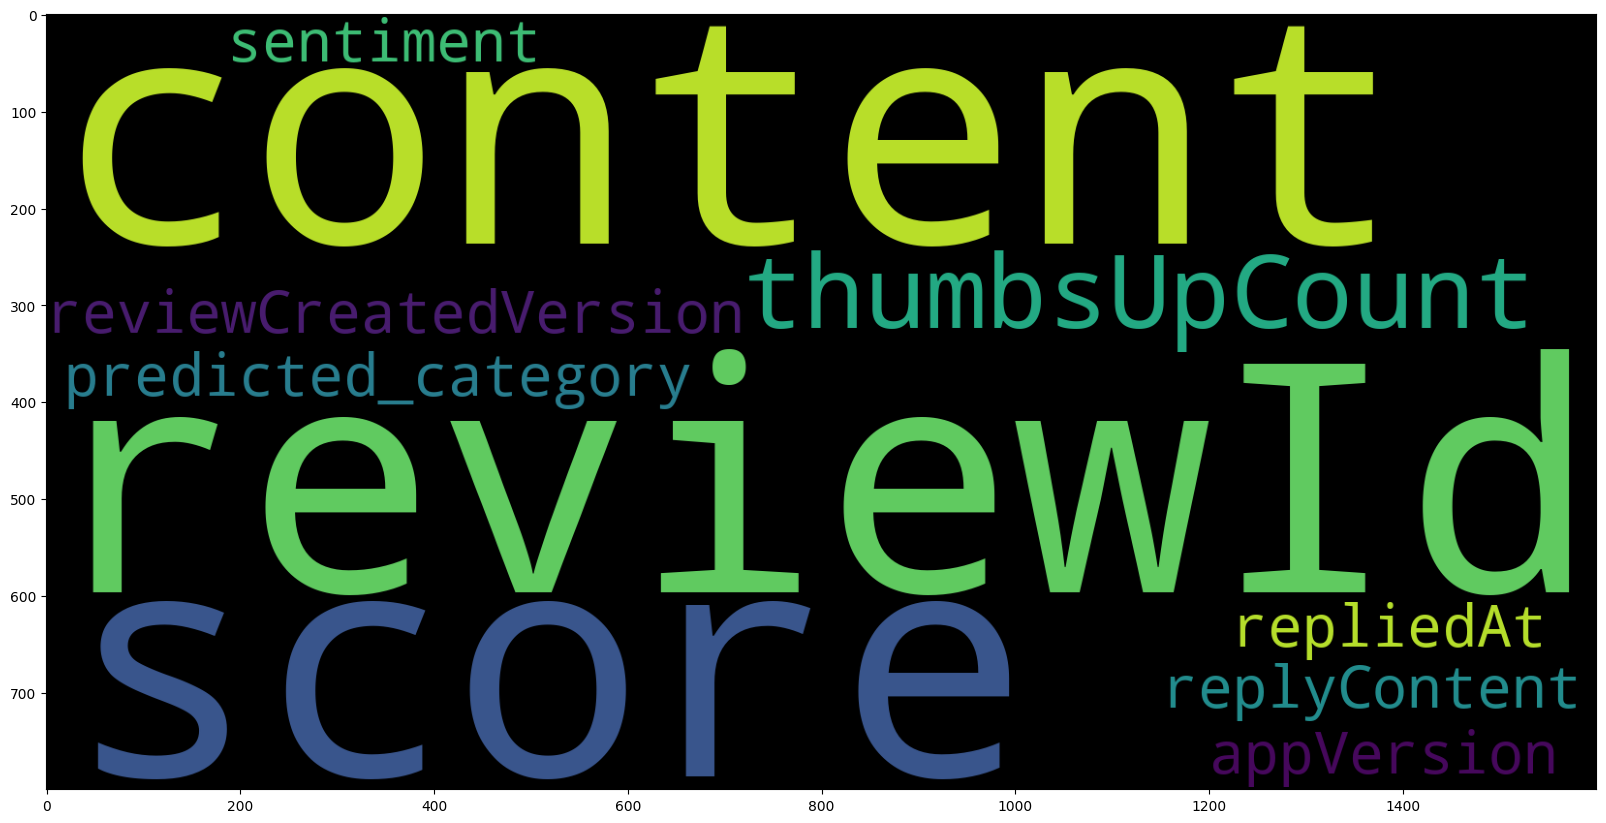

In [23]:
data_neg = df['content'][:10000]
plt.figure(figsize = (20,20))
wc = WordCloud(max_words = 1000 , width = 1600 , height = 800,collocations=True).generate(" ".join(data_pos))
plt.imshow(wc)

Modelling

In [24]:
X = df['content']
y = df['sentiment']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.15, random_state=42)

In [25]:
vectorizer = TfidfVectorizer(max_features=3000, ngram_range=(1, 2))
# Convert to Unicode
X_train_vec = vectorizer.fit_transform(X_train.astype('U'))
X_test_vec = vectorizer.transform(X_test.astype('U'))

In [26]:
X_train = X_train_vec
X_test = X_test_vec

In [27]:
def model_Evaluate(model):
    y_pred = model.predict(X_test)

Support Vector Classification Model

In [28]:
SVCmodel = LinearSVC()
SVCmodel.fit(X_train, y_train)
model_Evaluate(SVCmodel)
y_pred = SVCmodel.predict(X_test)

c:\Users\vibin\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\svm\_classes.py:32: FutureWarning: The default value of `dual` will change from `True` to `'auto'` in 1.5. Set the value of `dual` explicitly to suppress the warning.
  warnings.warn(


In [29]:
# Print the evaluation metrics for the dataset.
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

    NEGATIVE       0.77      0.77      0.77       801
     NEUTRAL       0.72      0.65      0.68      1087
    POSITIVE       0.94      0.95      0.95      5843

    accuracy                           0.89      7731
   macro avg       0.81      0.79      0.80      7731
weighted avg       0.89      0.89      0.89      7731



Macro average F1-score has increased showing improved overall performance across classes. The weighted average F1-score has also increased, reflecting the positive impact of the model update. 